## Прямолинейное движение

$\vec{v} = (v_x, v_y)$ - скорость объекта

Если мы знаем скорость движения, то можно вычислить положение объекта в следующий момент времени:

Пусть в данный момент (i) положение объекта - $(x_i, y_i)$, тогда в следующий момент времени (i+1) координаты тела будут такими: 
$$x_{i+1} = x_i + v_x * dt$$
$$y_{i+1} = y_i + v_y * dt$$

где $dt$ - промежуток времени, между двумя мгновениями i и i+1

In [10]:
import random

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
        
#######################################################

dt = .05
my_particles = []
num = 50

for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Прямолинейное движение частиц')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()

## Отражение от стенок

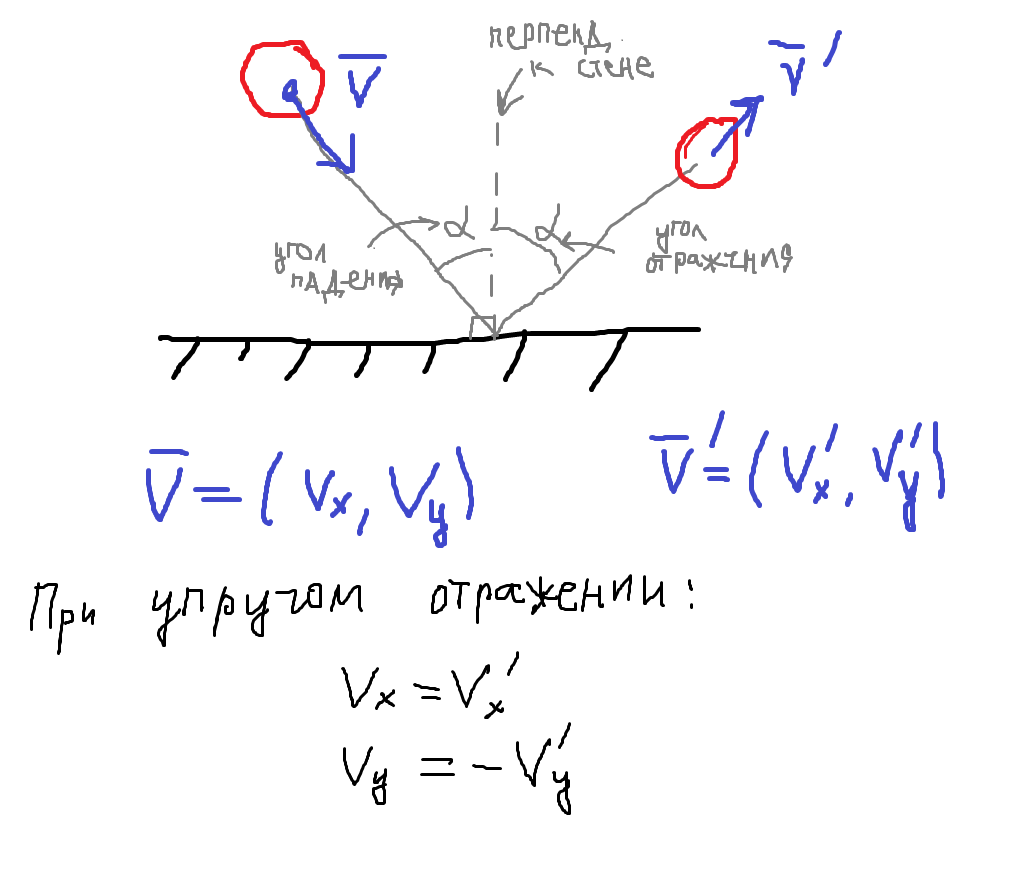

### Детекция столкновения

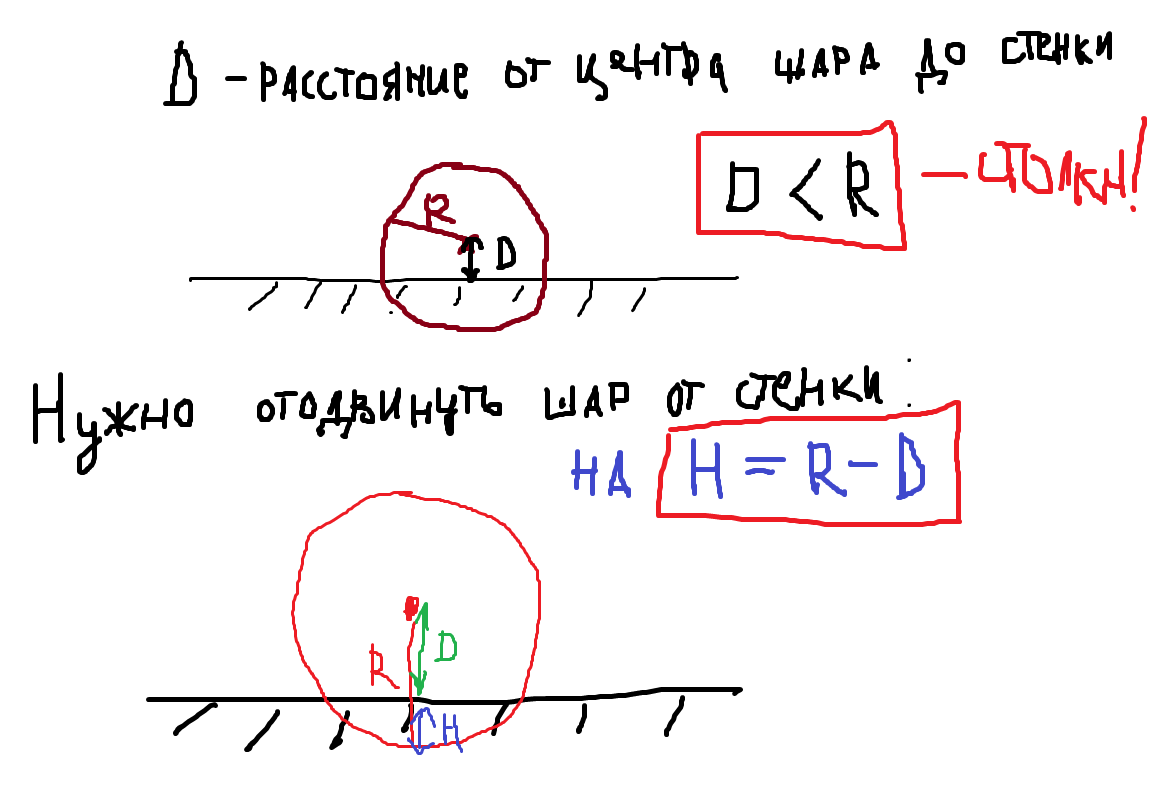

In [1]:
import random

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
        
#######################################################

dt = .05
my_particles = []
num = 50

for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Прямолинейное движение частиц')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


## ДЗ

1. Добавить одно вертикальное препятствие (отрезок, задаваемый своими концами A, B) и горизотальное препятствие (отрезок, задаваемый своими концами C, D)  
2. Добавить механизм проверки столкновения с этими препятствиями и отражения от них.

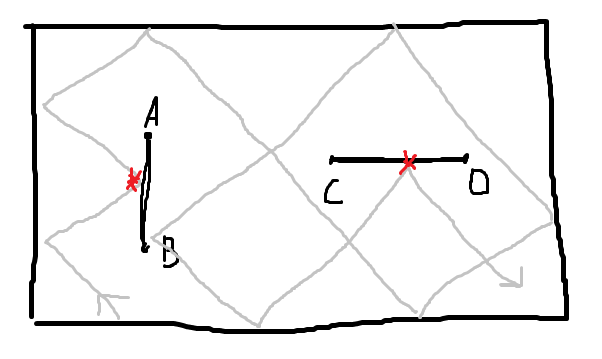

In [4]:
import random
import pygame

dt = .05
NUM = 30
BACKGROUND_COLOR = (255,255,0)
(WIDTH, HEIGHT) = (840, 480)

class Straight():
    def __init__(self, A, B):
        self.point0 = A
        self.vector = (B[0] - A[0], B[1] - A[1])

    def draw(self):
        pygame.draw.line(screen, (0,0,0), self.point0, (self.vector[0] + self.point0[0], self.vector[1] + self.point0[1]))

    def get_point_inter(self, another):
        dict = self.vector[0] * another.vector[1] - self.vector[1] * another.vector[0]
        if dict != 0:
            s = (another.vector[0] * (self.point0[1] - another.point0[1]) + another.vector[1] * (another.point0[0] - self.point0[0]))/dict
            if -0.05 <= s <= 1.05:
                return (self.vector[0] * s + self.point0[0], self.vector[1] * s + self.point0[1])
            else:
                return (0, 0)
        else:
            return (0, 0)

class Particle():

    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity

    def move(self, mas_str):
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt

        # проверка столкновения с нижней стенкой
        D = HEIGHT - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = WIDTH - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        # проверка на столкновение со стенками
        for str in mas_str:
            #вертикальные стенки
            if str.vector[0] == 0:
                straight_pos = Straight(self.position, (self.position[0] + self.radius, self.position[1]))
                point_inter = str.get_point_inter(straight_pos)
                if point_inter != (0, 0) and self.get_mod_pos(point_inter) < self.radius:
                    if self.position[0] > point_inter[0]:
                        self.position[0] += self.radius - self.get_mod_pos(point_inter)
                    else:
                        self.position[0] -= self.radius - self.get_mod_pos(point_inter)
                    self.velocity[0] *= -1
            #горизонтальные стенки
            elif str.vector[1] == 0:
                straight_pos = Straight(self.position, (self.position[0], self.position[1] + self.radius))
                point_inter = str.get_point_inter(straight_pos)
                if point_inter != (0, 0) and self.get_mod_pos(point_inter) < self.radius:
                    if self.position[1] > point_inter[1]:
                        self.position[1] += self.radius - self.get_mod_pos(point_inter)
                    else:
                        self.position[1] -= self.radius - self.get_mod_pos(point_inter)
                    self.velocity[1] *= -1

    def get_mod_pos(self, point):
        return ((self.position[0] - point[0])**2 + (self.position[1] - point[1])**2)**0.5

    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position),
                           self.radius, 2)

#######################################################

my_particles = []
my_obstacles = []

for i in range(NUM):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)

my_obstacles.append(Straight((0, 300), (300, 300)))
my_obstacles.append(Straight((300, 0), (300, 300)))
#my_obstacles.append(Straight((150, 300), (150, 480)))
#######################################################

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption('Прямолинейное движение частиц')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill(BACKGROUND_COLOR)

    for i in my_particles:
        i.move(my_obstacles)
        i.draw()

    for i in my_obstacles:
        i.draw()
    pygame.display.flip()

pygame.quit()